# Principal Component Analysis (PCA)

<br>
Principal Component Analysis or PCA is a classical linear approach to dimensionality reduction. As baffling as it may sound, this is however a relatively simple concept. Let's say you have a huge dataset and you want to predict a target. The dataset contains an overwhelming number of variables to consider and you don't know which ones to pick. Do you understand the relationships between each variable? Having so many variables, can you ensure that you are not overfitting your model to your data?

PCA helps you solve this problem, by reducing the dimensions of your feature space. By reducing the dimensions of your feature space, you have fewer relationships between variables to consider thereby speeding up your algorithm; Also you are less likely to overfit your model.

As seen earlier, huge datsets have many columns to consider, making it hard to perform Machine Learning operations for Analysis and Prediction.
1. Statistical methods count observations that occur in a given space
2. As the dimensions increase, number of observations in space become sparser
3. Any model/estimator would require more time to converge to the true value

**Dimensionality Reduction** is a method of converting dataset with vast dimensions to one with lesser dimensions also minimizing the extent of information loss. It is an effective approach to downsize data.

<image>
    
## 1. Approaches to Dimensionality Reduction

**A) Feature Selection:** 

It filters out irrelevant or redundant features from your dataset and chooses an optimal set of features! Only a subset of the original features are selected. It can be either
- unsupervised (e.g. Variance Thresholds) or 
- supervised (e.g. Genetic Algorithms)

**B) Feature Extraction:** 

It creates a new, smaller set of features by mapping original high-dimensional data onto a low-dimesnional space. The difference between Feature Selection and Feature Extraction is that Feature Selection keeps a subset of the original features while Feature Extraction creates new ones. It can be either
- unsupervised (i.e. **PCA**) - maximizes the variance of the data
- supervised (i.e. LDA) - maximizes the separation between different classes (*LDA stands for __Linear Discriminant Analysis__*)



In [1]:
# pre-loaded code

# hint

In [2]:
# Solution

In [3]:
# code testing
ref_tmp_var = True
assert ref_tmp_var

## 2. PCA

PCA is an unsupervised algorithm that converts a set of observations of possibly correlated variables into a set which is a combination of original features. The new set of values are linearly uncorrelated variables called **principal components**.

All dimension reduction techniques involve some degree of information loss. The goal of PCA is to reduce dimensionality while retaining as much variation as possible in the dataset!

__Applications of PCA:__
* Easing visualization of a huge dataset: (by reducing the dimensions of feature space)
* Speeding up Machine Learning algorithms: (with reduced number of columns, ML algorithms can run a lot more faster)

## 3. PCA Approach

1. Standardize the data
2. Calculate the covariance matrix
3. Perform eigen decomposition on the covariance matrix
4. Sort eigenvalues in descending order and choose ** *k* ** Eigenvectors that correspond to the ** *k* ** largest Eigenvalues (where ** *k* ** is the number of dimensions of the new feature subspace)
5. Construct the projection matrix **W** from the selected ** *k* ** eigenvectors
6. Project the data into into the subspace **W**

<br>
Let's see in detail all these steps using the famous "Iris" dataset.

Loading "Iris" dataset:
``` python
import pandas as pd
from sklearn.datasets import load_iris

raw = load_iris()
iris = pd.DataFrame(raw.data, columns=raw.feature_names)
iris['Target'] = raw['target']
iris.head()
```
The Iris dataset:
``` python
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  Target
0                5.1               3.5                1.4               0.2       0
1                4.9               3.0                1.4               0.2       0
2                4.7               3.2                1.3               0.2       0
3                4.6               3.1                1.5               0.2       0
4                5.0               3.6                1.4               0.2       0

```
Clearly we can see that, the Iris dataset has four features:
> 1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

and one 'Target' column which defines the target species that can be either 'setosa','versicolor' or 'virginica'.

### Loading data:
Now, we load **'tips'** dataset from seaborn and use this dataset to perfrom PCA.

In [3]:
import seaborn as sns

raw = sns.load_dataset('tips')
raw.info()

# Click continue to proceed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


# hint

In [2]:
# Solution

In [6]:
# code testing
ref_tmp_var = True
assert ref_tmp_var

### 3.1 Standardize the data
<br>
**Why do we need to standardize data?**<br>
Given a dataset, variables measured at different scales do not contribute equally to analysis. For example, in boundary detection, a variable that ranges between 0 and 100 will outweigh a variable that ranges between 0 and 1. In such a case, how do you know when an outlier occurs? Does it make sense to compare these variables ‘as is’ in a multivariate analysis?

This is where Standardization comes into play. In simpler terms, Standardization allows us to use one single distribution to compare multi-variate data (say apples to oranges or bananas to grapes). Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data. Standardization rescales data to have a mean (μ) of 0 and standard deviation (σ) of 1 (unit variance). Lets understand the terms: 

> **a) Mean (μ):**
    Average of a set of data <br>
<img src="../images/pca-mean.png">
    
>  **b) Variance (σ²):**
    The average of the squared differences from the mean <br>
<img src="../images/pca-variance.png">  

>  **c) Standard Deviation (σ):**
    Square root of the variance
<img src="../images/pca-std_deviation.jpg" width="180">
    
The *scikit-learn* library has inbuilt function *StandardScaler()* that could standardize the data.
``` python
from sklearn.preprocessing import StandardScaler

X = iris.drop('Target', axis=1)
X_std = StandardScaler().fit_transform(X)
```
<br>

### Exercise
Let's say we want to use all the inforamtion from the **tips** dataset and predict the *total_bill*. Let's keep *total_bill* as the target variable. Using 'tips' variable, leave out the target and use StandardScaler function to standardize the data.

In [7]:
#Converting categorical values into numerical values
tips = raw.copy()
cols_to_transform = ['sex','smoker','day','time']
for x in cols_to_transform:
    tips[x] = raw[x].cat.codes

from sklearn.preprocessing import StandardScaler

# Add your code here



# hint
Follow the same steps as shown in the example above

In [8]:
X = tips.drop('total_bill', axis=1)
X_std = StandardScaler().fit_transform(X)

In [9]:
# code testing
ref_tmp_var = True
assert ref_tmp_var

### 3.2 Calculate the covariance matrix

The covariance matrix Σ, is a d×d matrix where each element represents the covariance between two features. **Covariance** is a measure of how changes in one variable are associated with changes in a second variable. It’s similar to variance, but where variance tells you how a single variable varies, Covariance tells you how two variables vary together.

<img src="../images/pca-covar_matrix.png",width="500">

Let's see how we can calculate the co-variance matrix using *numpy* library
``` python
import numpy as np
from numpy import cov

X_mean = np.mean(X_std, axis=0)
cv_mat = cov((X_std - X_mean).T)
print('Covariance matrix \n', cv_mat)

>>>
Covariance matrix 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
```

### Exercise
Calculate the covariance matrix of **tips** dataset.

In [10]:
import numpy as np
from numpy import cov

#Add your code here
#cv_mat = 
#print('Covariance matrix: \n', cv_mat)

# hint
Follow the same steps as shown in the example above

In [11]:
X_mean = np.mean(X_std, axis=0)
cv_mat = cov((X_std - X_mean).T)
print('Covariance matrix: \n', cv_mat)

Covariance matrix: 
 [[ 1.00411523 -0.08922775 -0.00595294  0.13605637  0.12212959  0.49131235]
 [-0.08922775  1.00411523  0.00282754 -0.23174068 -0.20607587 -0.08654953]
 [-0.00595294  0.00282754  1.00411523  0.03278768 -0.05514712  0.1337263 ]
 [ 0.13605637 -0.23174068  0.03278768  1.00411523  0.87796459  0.16602997]
 [ 0.12212959 -0.20607587 -0.05514712  0.87796459  1.00411523  0.10383647]
 [ 0.49131235 -0.08654953  0.1337263   0.16602997  0.10383647  1.00411523]]


In [12]:
# code testing
ref_tmp_var = True
assert ref_tmp_var


### 3.3 Perform eigendecomposition on the covariance matrix

The eigenvectors and eigenvalues of a covariance matrix form the "core" of a PCA: The eigenvectors represent the directions or principal components, and the eigenvalues determine their magnitude.

Given:
> **λ:** scalar <br>
**I;** identity matrix <br>
**A:** non-singular matrix (our covariance matrix) <br>

**a) Eigenvalues:**

The values of **λ** for which **det (A-λI)=0** are called eigenvalues

**b) Eigenvectors:**

A vector ** *v* ** for which **(A-λI)*v*=0** is called eigenvector
<br>

Let's see how we can calculate the eigenvectors and eigenvalues using *numpy* library
``` python
from numpy.linalg import eig

e_values, e_vectors = eig(cv_mat)
print('Eigenvectors \n', e_vectors)
print('\nEigenvalues \n', e_values)

>>>
Eigenvectors 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
 [2.93035378 0.92740362 0.14834223 0.02074601]
```
<br>

**Note:** Instead of Eigen Decomposition, other matrix decomposition methods can be used such as **Singular-Value Decomposition (SVD)**. Most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency.
<br>

### Exercise
Compute the eigenvectors and eigenvalues of **tips** dataset

In [13]:
from numpy.linalg import eig

#Add your code here


#print('Eigenvectors: \n', ******)
#print('\nEigenvalues: \n', ******)

# hint
Follow the same steps as shown in the example above

In [14]:
e_values, e_vectors = eig(cv_mat)
print('Eigenvectors: \n', e_vectors)
print('\nEigenvalues: \n', e_values)

Eigenvectors: 
 [[-0.29823534  0.5991193  -0.01608591  0.67924984  0.29441428  0.06158629]
 [ 0.28650008  0.05754132 -0.01980564  0.00323594 -0.0352947   0.95548849]
 [-0.02272752  0.23693619  0.06258     0.19723033 -0.94803887 -0.04184427]
 [-0.61464125 -0.27112681 -0.70923984 -0.01582923 -0.11116318  0.18187196]
 [-0.59834243 -0.32444861  0.70004226  0.03094863 -0.02347326  0.21248871]
 [-0.30439991  0.63468863  0.04850151 -0.70604603  0.01971229  0.05717582]]

Eigenvalues: 
 [2.11627407 1.38596289 0.11990368 0.49366109 1.00576777 0.90312187]


In [15]:
# code testing
ref_tmp_var = True
assert ref_tmp_var


### 3.4 Choose ** *k* ** eigenvectors

This is the most important step in PCA approach as the eigenvectors define the directions of the new axis. Therefore we have to carefully choose ** *k* ** eigenvectors that correspond to the ** *k* ** largest Eigenvalues (where ** *k* ** is the number of dimensions of the new feature subspace)

**Steps in choosing eigenvectors:**<br>
1.Rank the eigenvalues from highest to lowest: This is because the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data and they can be dropped.

Now let's create the EigenPairs and sort them based on the eigenvalues from highest to lowest.

``` python
e_pairs = [(np.abs(e_values[i]), e_vectors[:,i]) for i in range(len(e_values))]
e_pairs.sort(reverse=True)
e_pairs

>>>
[(2.930353775589318,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.927403621517341,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14834222648164,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.0207460139955958,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]
```
<br>

2.Decide on the value of ** *k* **: There is no single golden method to select ** *k* **, there are multiple ways. It all depends on what works well for your model. One way is to use a **Scree plot**. The most commonly used way is plotting **Percentage of Cumulative Variance** and visually choosing ** *k* **.

<img src="../images/pca-choosing_k.png">

Lets see the plot of Percentage of Cumulative Variance:
    First we calculate the sum of Variance, and then we calculate the percentage of variance of each principal component (Explained Variance). Later we calculate the Cumulative Variance as shown below.
    
``` python
tot_var = sum(e_values)
exp_var_percent = [(i / tot_var)*100 for i in e_values]
cum_var = np.cumsum(exp_var_percent)
print('Explained Variance \n', exp_var_percent)
print('\nCumulative Variance \n', cum_var)

>>>
Explained Variance 
 [72.77045209380135, 23.03052326768062, 3.6838319576273912, 0.5151926808906288]

Cumulative Variance 
 [ 72.77045209  95.80097536  99.48480732 100.        ]
```

This information would make more sense when we visualize graphically.

``` python
import matplotlib.pyplot as plt

x = ['PC %s' %i for i in range(1,len(e_values)+1)]
y_1 = exp_var_percent
y_2 = cum_var
plt.bar(x, y_1)
plt.scatter(x, y_2)
plt.plot(x, y_2)
for i,j in zip(x,y_1):
    plt.annotate(str(round(j,2)),xy=(i,j+0.5))
```

<img src="../images/pca-cum_var_plot.png", width="500">


From the above plot it is evident that most of the variance is explained by the first principal component(72.77% of the variance) and the second principal component(23% of the variance) alone. Together they contain 95.8% of the information. The third and the fourth principal components can be safely dropped wihtout loosing to much information. Since we need just two principal components to explain the information, the value of ** *k* ** now is 2.
<br>

### Exercise
Decide on the value of ** *k* ** for **tips** dataset. First, calculate the Explained variance and Cumulative variance. Second, plot the principal components against the Percentage of Cumulative Variance. From the plot visually choose ** *k* **.

In [16]:
e_pairs = [(np.abs(e_values[i]), e_vectors[:,i]) for i in range(len(e_values))]
e_pairs.sort(reverse=True)

# Add your code for calulation here


import matplotlib.pyplot as plt
# Add your code for plot here



# hint
Follow the same steps as shown in the example above

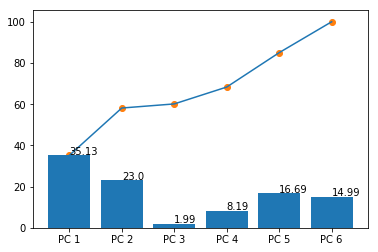

In [17]:
tot_var = sum(e_values)
exp_var_percent = [(i / tot_var)*100 for i in e_values]
cum_var = np.cumsum(exp_var_percent)

x = ['PC %s' %i for i in range(1,len(e_values)+1)]
y_1 = exp_var_percent
y_2 = cum_var
plt.bar(x, y_1)
plt.scatter(x, y_2)
plt.plot(x, y_2)
for i,j in zip(x,y_1):
    plt.annotate(str(round(j,2)),xy=(i,j+0.5))

In [18]:
# code testing
ref_tmp_var = True
assert ref_tmp_var


### 3.5 Construct the projection matrix **W**

Once the ** *k* ** value is choosen the, a subspace is created so that data can be projected into this subspace. This subspace is also called the **Projection Matrix**, which is basically a matrix of our concatenated top k eigenvectors.

For Iris dataset, by choosing the top 2 eigenvectors, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace.

``` python
matrix_w = np.hstack((e_pairs[0][1].reshape(4,1), 
                      e_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', matrix_w)

>>> Matrix W:
[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]
```
<br>

### Exercise
Looking at the plot you have got in the previous exercise, it can be seen that most of the variance is explained by the first (35.13%), second (23%), fifth (16.69%) and sixth 14.99%) principal components alone. Together they contain around 90% of the information. Hence we choose ** *k*=4 ** for our problem.

Now create the projection matrix of the top ** *k*=4 ** eigenvectors.

In [19]:
# Add your code here
#matrix_w = 
#print('Matrix W:\n', matrix_w)

# hint

In [20]:
matrix_w = np.hstack((e_pairs[0][1].reshape(6,1), 
                      e_pairs[1][1].reshape(6,1),
                      e_pairs[4][1].reshape(6,1),
                      e_pairs[5][1].reshape(6,1),))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.29823534  0.5991193   0.67924984 -0.01608591]
 [ 0.28650008  0.05754132  0.00323594 -0.01980564]
 [-0.02272752  0.23693619  0.19723033  0.06258   ]
 [-0.61464125 -0.27112681 -0.01582923 -0.70923984]
 [-0.59834243 -0.32444861  0.03094863  0.70004226]
 [-0.30439991  0.63468863 -0.70604603  0.04850151]]


In [21]:
# code testing
ref_tmp_var = True
assert ref_tmp_var


### 3.6 Project the data into into the subspace **W**

Once the projection matrix is created, then the data can be transformed onto the new subspace via *matrix multiplication* as given by the equation: <br>
**Y = X × W**

``` python
Y = X_std.dot(matrix_w)
```

In our example we have reduced the subspace from 4-dimensions to 2-dimensions. Let's visualize the distribution of our targets in our datset using *matplotlib*

``` python
fig, ax = plt.subplots()

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
c_map = {0: 'b', 1: 'r', 2:'g'}
for i in range(0,len(Y)):
    ax.scatter(Y[i,0],Y[i,1],c=c_map[iris.iloc[i]['Target']])

plt.legend(['setosa','versicolor','virginica'])
```

<img src="../images/pca-reduced_subspace.png", width="700">

### Exercise
Project the data into the subspace you created in the previous exercise. (No plot is required)

In [22]:
# Add your code here

# hint

In [23]:
Y = X_std.dot(matrix_w)

In [24]:
# code testing
ref_tmp_var = True
assert ref_tmp_var

## 4. PCA in scikit-learn

As we have seen above, the PCA approach using *numpy* library involves a lot of effort and time. This can be avoided by using the *scikit-learn* library as it has a predefined function that can handle PCA for us. The advantage is that once a projection is calculated, it can be applied to new data again and again quite easily.

For example we can observe the distribution of our targets in the same datset as used above using *scikit-learn*

``` python
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

fig, ax = plt.subplots()

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
c_map = {0: 'b', 1: 'r', 2:'g'}
for i in range(0,len(Y_sklearn)):
    ax.scatter(Y_sklearn[i,0],Y_sklearn[i,1],c=c_map[iris.iloc[i]['Target']])

plt.legend(['setosa','versicolor','virginica'])
```

<img src="../images/pca-using_sklearn.png", width="700">

### Exercise
Now, use **PCA()** function from **sklearn** to perform PCA on tips dataset. (No plot is required)

In [25]:
from sklearn.decomposition import PCA as sklearnPCA

# Add your code here

# hint

In [26]:
sklearn_pca = sklearnPCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [27]:
# code testing
ref_tmp_var = True
assert ref_tmp_var